In [8]:
#Importar bibliotecas
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
#Cargar los datos
wine = load_wine()

In [11]:
#Convertir a pandas dataframe
data = pd.DataFrame(np.c_[wine['data'], wine['target']],columns=wine['feature_names']+['target'])

In [12]:
#Revisar los valores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [13]:
#Definir conjunto de entrenamiento
x = wine.data
y = wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
#Modelos
models = {
    'Regresión Logística' : LogisticRegression(max_iter=200), #técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos y predecir el valor de uno de esos factores basándose en el otro. #Normalmente, la predicción tiene un número finito de resultados, como un sí o un no.
    'Máquinas de Soporte Vectorial ': SVC(), #tipo de algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión en problemas de Machine Learning. La idea es encontrar un hiperplano que separe de manera óptima las diferentes clases de datos
    'Árbol de Decisión' : DecisionTreeClassifier()   #algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

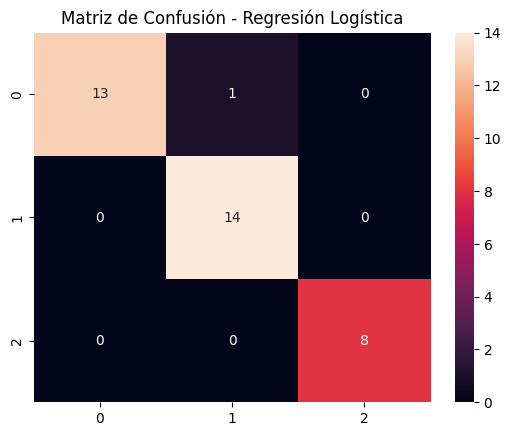

Modelo: Regresión Logística
Accuracy: 0.9722222222222222
Precisión: 0.9777777777777779
Recall: 0.9761904761904763
F1-Score: 0.9761600681140911
Validación Cruzada (5-folds): 0.9666666666666666
-----------------------------------------------



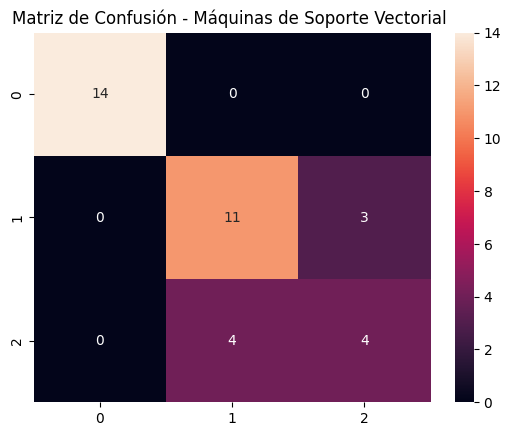

Modelo: Máquinas de Soporte Vectorial 
Accuracy: 0.8055555555555556
Precisión: 0.7682539682539682
Recall: 0.7619047619047619
F1-Score: 0.7639846743295019
Validación Cruzada (5-folds): 0.6634920634920635
-----------------------------------------------



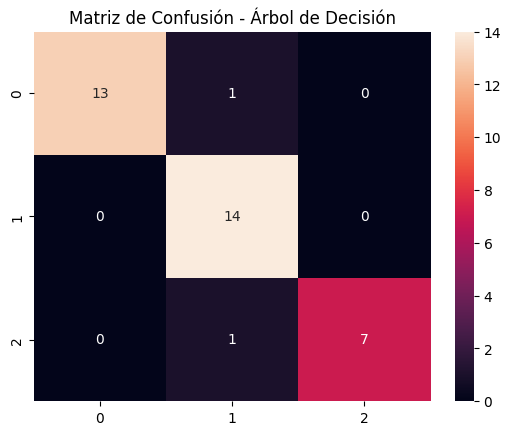

Modelo: Árbol de Decisión
Accuracy: 0.9444444444444444
Precisión: 0.9583333333333334
Recall: 0.9345238095238096
F1-Score: 0.94320987654321
Validación Cruzada (5-folds): 0.8876190476190475
-----------------------------------------------



In [15]:
#Evaluación de los modelos
for name, model in models.items():
  #Entrenamiento
  model.fit(x_train, y_train)
  #Prediccion
  y_pred = model.predict(x_test)
  #Métricas de Rendimiento - Ayuda a entender cómo funciona desde diferentes puntos cada uno de los elementos que tuvimos en cada modelo
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro') #Proporcion de las predicciones correctas para una clase dada
  recall = recall_score(y_test, y_pred, average='macro') #Proporción de instancias reales de una clase que fueron predichas correctamente. (Casos relevantes dentro de un conjunto de datos)
  f1 = f1_score(y_test, y_pred, average='macro') #metrica que combina la precision y el recall en un sólo número dando una idea de equilibrio de estas 2 metricas

  #Validacion cruzada es una técnica que se utiliza para evaluar la capacidad de generalización de un modelo
  #se obtendra al final es una lista de 5 valores que representan el rendimiento por defecto, la precision del modelo en cada uno de los 5 folds
  #al final se muestra el promedio de los 5 valores para obtener una única metrica de rendimiento
  #la validacion cruzada proporciona una estimación mucho más robusta del rendimiento del modelo
  cross_val = cross_val_score(model, x, y, cv=5)


  #matriz de confusion: ayuda a interpretar los valores que se van a encontrar - falsos positivos, falsos negativos
  conf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_matrix, annot=True) #Creacion de mapa de calor con los resultados de la matrix
  plt.title(f'Matriz de Confusión - {name}')
  plt.show()

  #Imprimir resultados
  print(f'Modelo: {name}')
  print(f'Accuracy: {accuracy}')
  print(f'Precisión: {precision}')
  print(f'Recall: {recall}')
  print(f'F1-Score: {f1}')
  print(f'Validación Cruzada (5-folds): {cross_val.mean()}')
  print('-----------------------------------------------\n')
